In [1]:
from src.utils.image_loader import ImageLoader
from src.utils.visualisation import DatasetVisualizer


In [2]:
dataset = ImageLoader(root_path=r"C:\Users\PC\Desktop\données\deepfake_database",extensions={".jpg", ".jpeg", ".png"},recursive=True)

In [3]:
dataset.get_dataset_stats()

{'total_images': 19457,
 'extensions': {'.jpg': 19456, '.jpeg': 1, '.png': 0},
 'class_distribution': {'df': 7948, 'real': 11509},
 'class_statistics': {'df': {'count': 7948, 'extensions': {'.jpg': 7948}},
  'real': {'count': 11509, 'extensions': {'.jpg': 11508, '.jpeg': 1}}}}

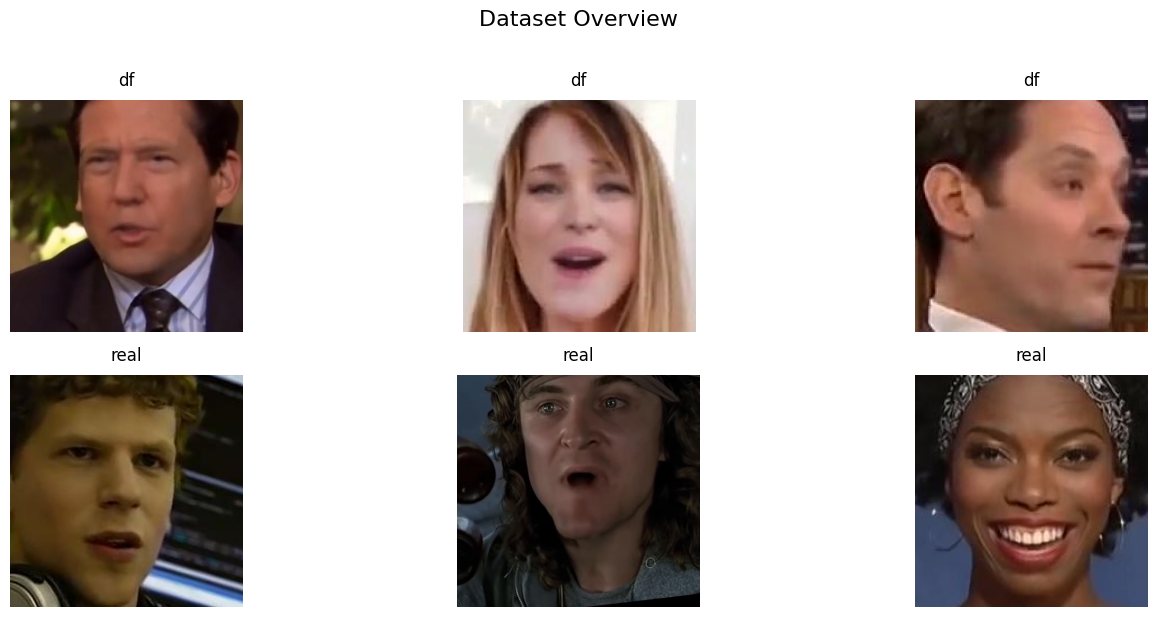

In [9]:
DatasetVisualizer.viz(dataset, images_per_class=3)